# PCA



* this is a toy example with such a low number of features usually you don't use PCA
* but because is a small dataset it allows to plot graphs that can explain how the PCA works

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# import some data from the built-in dataset of scklearn
from sklearn import datasets
iris = datasets.load_iris()

* these are the labels 
{0: 'setosa', 1: 'versicolor', 2: 'virginica'}

In [3]:
df = pd.DataFrame(iris.data, columns = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width'])
df["target"] = iris.target

/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


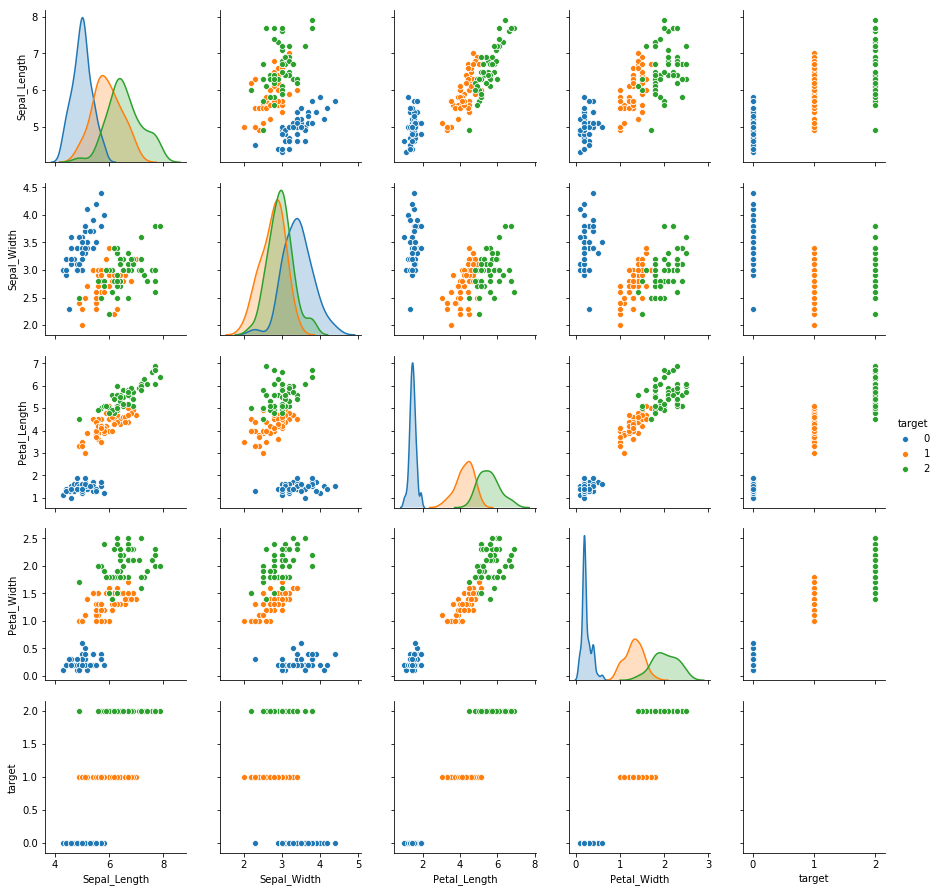

In [4]:
sns.pairplot(df, hue="target")

## Create the X and y

In [5]:
y = df["target"]
X = df[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]

### PCA features

The iris dataset is 4-dimensional. But what is its **intrinsic dimension**? (**Intrinsic dimension** = number of features needed to approximate the dataset) 

* we are going to use PCA to find the solution to this question



* first **we need to scale the data**

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
# Create scaler: scaler
scaler = StandardScaler()

In [8]:
# Fit_transform scaler to 'X'
X_norm = scaler.fit_transform(X)

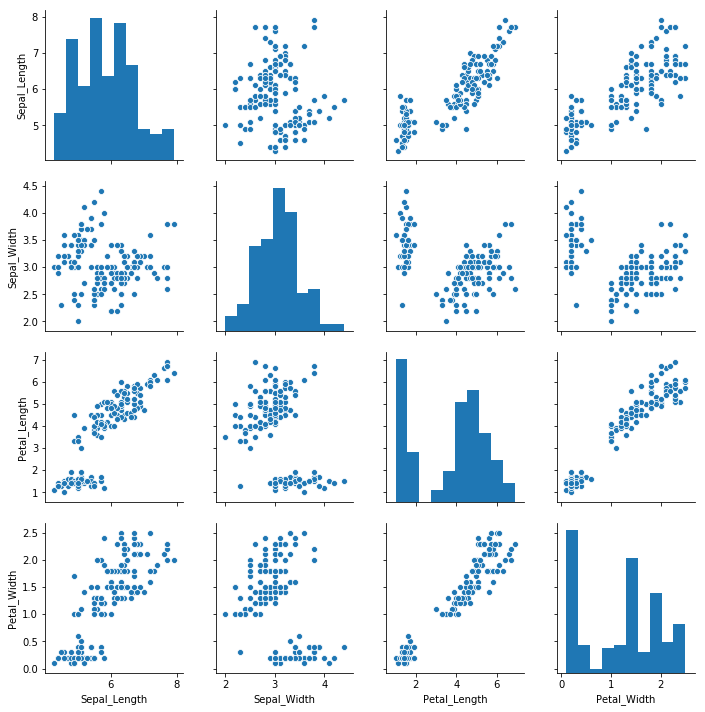

In [12]:
X_norm_df = pd.DataFrame(X_norm)
X_norm_df.describe()
#X.describe()

sns.pairplot(X)
#sns.pairplot(X_norm_df)

* now we can create the PCA and fit the data

In [13]:
from sklearn.decomposition import PCA

In [14]:
# Create a PCA instance:
pca = PCA() # try 0.90

In [15]:
# Fit pca to 'X'
pca_features = pca.fit_transform(X_norm)
pca_features.shape


(150, 4)

### we can also plot how much variance of the data each PCA feature explains

* Use the plt.bar() function to plot the explained variances, with features on the x-axis and ```pca.explained_variance_``` on the y-axis.

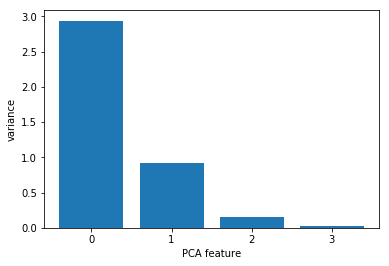

In [16]:
import matplotlib.pyplot as plt

# Plot the explained variances

features = range(0, pca.n_components_) # this is just to make the graph flexible if size of x increases
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

##### Looking at the plot, what do you think would be a reasonable choice for the "intrinsic dimension" of the the iris dataset? 
* Recall that the intrinsic dimension is the number of PCA features with significant variance.
* try to use **keep 90% of the variance** and plot the graph again

### more plots - look how the classes are separated after the PCA



In [17]:
new_df = pd.DataFrame(pca_features)
new_df["target"] = df["target"]
new_df.head()

,0,1,2,3,target
0,-2.264703,0.480027,-0.127706,-0.024168,0
1,-2.080961,-0.674134,-0.234609,-0.103007,0
2,-2.364229,-0.341908,0.044201,-0.028377,0
3,-2.299384,-0.597395,0.091290,0.065956,0
4,-2.389842,0.646835,0.015738,0.035923,0


/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/usr/local/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


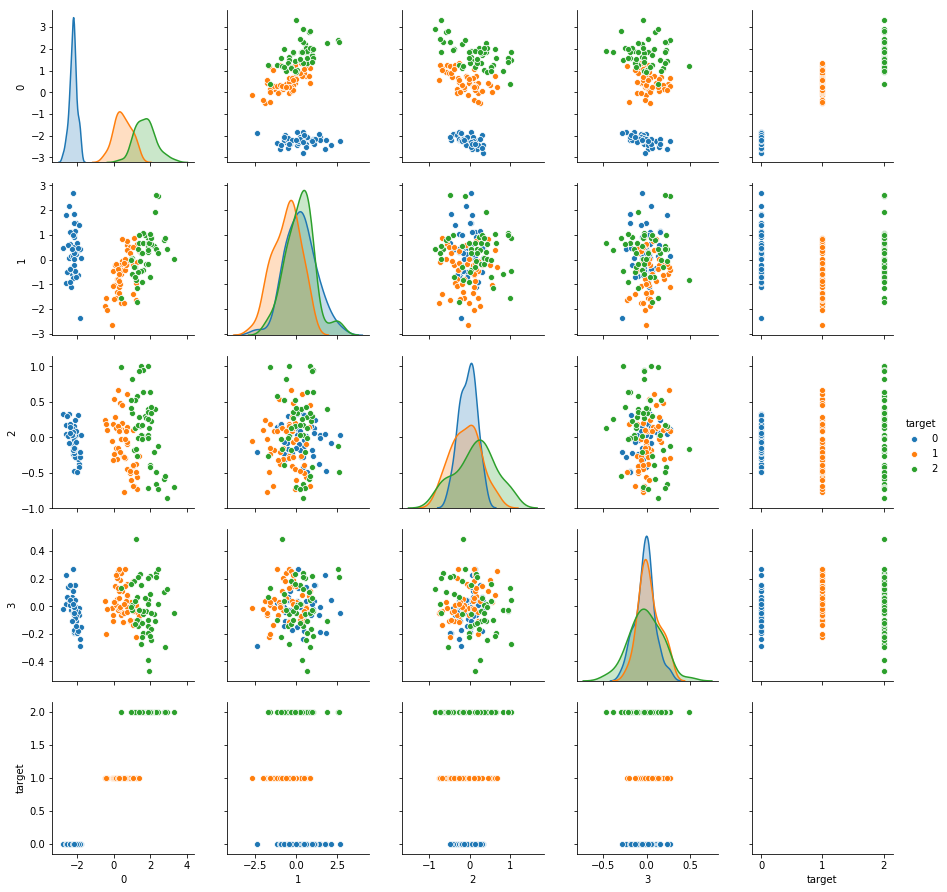

In [18]:
sns.pairplot(new_df, hue = "target")

# Create a model With PCA data

### split the data

In [22]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_features, y)  # here we pass the PCA features

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [36]:
lr.fit(x_train, y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [37]:
lr.score(x_train,y_train)

0.9642857142857143

In [38]:
lr.score(x_test,y_test)

0.9210526315789473

## model without PCA


In [41]:
x_train, x_test, y_train, y_test = train_test_split(X, y)
lr = LogisticRegression()
lr.fit(x_train, y_train)
lr.score(x_train,y_train)

/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


0.9642857142857143

In [42]:
lr.score(x_test,y_test)

0.9736842105263158

# your turn


* try different value for pca
* compare the original and the pair plot after PCA and make a conclusion is PCA is useful in this case.
* extra - try random forest (se below solution)
* look at the day of Random Forest Notebook or Scikit learn Random Forest

In [51]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(pca_features, y) 

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [53]:
rfc.score(x_train,y_train)

1.0

In [54]:
rfc.score(x_test,y_test)

0.9736842105263158

* without PCA

In [57]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y) 
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)
rfc.score(x_train,y_train)

1.0

In [58]:
rfc.score(x_test,y_test)

0.9473684210526315